<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Load-the-libraries" data-toc-modified-id="Load-the-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load the libraries</a></span></li><li><span><a href="#Load-the-Data" data-toc-modified-id="Load-the-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load the Data</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Target-Distribution" data-toc-modified-id="Target-Distribution-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Target Distribution</a></span></li><li><span><a href="#Univariate-Analysis" data-toc-modified-id="Univariate-Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Univariate Analysis</a></span><ul class="toc-item"><li><span><a href="#Numerical-Variables" data-toc-modified-id="Numerical-Variables-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Numerical Variables</a></span></li><li><span><a href="#Categorical-Variables" data-toc-modified-id="Categorical-Variables-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Categorical Variables</a></span></li></ul></li><li><span><a href="#Bivariate-Analysis" data-toc-modified-id="Bivariate-Analysis-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Bivariate Analysis</a></span><ul class="toc-item"><li><span><a href="#Gender" data-toc-modified-id="Gender-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Gender</a></span></li><li><span><a href="#Married" data-toc-modified-id="Married-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Married</a></span></li><li><span><a href="#Spending-Score" data-toc-modified-id="Spending-Score-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Spending Score</a></span></li><li><span><a href="#Graduated" data-toc-modified-id="Graduated-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Graduated</a></span></li><li><span><a href="#Profession" data-toc-modified-id="Profession-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Profession</a></span></li></ul></li><li><span><a href="#Correlation" data-toc-modified-id="Correlation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Correlation</a></span></li></ul></div>

# Introduction
- https://datahack.analyticsvidhya.com/contest/janatahack-customer-segmentation/True/#ProblemStatement  


**Problem Statement**
An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market. 

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers. 

You are required to help the manager to predict the right group of the new customers.

**Data Description**  

| Variable | Definition |
| :---|:---|
| ID | Unique ID |
| Gender | Gender of the customer |
| Ever_Married | Marital status of the customer |
| Age | Age of the customer |
| Graduated | Is the customer a graduate? |
| Profession | Profession of the customer |
| Work_Experience | Work Experience in years |
| Spending_Score | Spending score of the customer |
| Family_Size | Number of family members for the customer (including the customer) |
| Var_1 | Anonymised Category for the customer |
| Segmentation | (target) Customer Segment of the customer |

**Evaluation Metric**
The evaluation metric for this hackathon is Accuracy Score.



# Load the libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import pandas_profiling as pdp

# Load the Data

In [5]:
df = pd.read_csv('../data/raw/train.csv')
print(df.shape)
df.head(2).append(df.tail(2))

# its a very small dataset, only 8k samples are there.

(8068, 11)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B
8067,461879,Male,Yes,37,Yes,Executive,0.0,Average,3.0,Cat_4,B


In [6]:
pdp.ProfileReport(df)

In [6]:
"""
check missing values
check rationality, eg age, work experience, 
check outliers
categorical features

""";

ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6


# Exploratory Data Analysis

In [12]:
df.describe()
"""
look at min,max to check for irrational values.

""";

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [13]:
df.isna().sum()
# there are some missing values.

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [14]:
df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [15]:
for c in df.select_dtypes('object').columns:
    print()
    print(c)
    print(df[c].value_counts())


Gender
Male      4417
Female    3651
Name: Gender, dtype: int64

Ever_Married
Yes    4643
No     3285
Name: Ever_Married, dtype: int64

Graduated
Yes    4968
No     3022
Name: Graduated, dtype: int64

Profession
Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

Spending_Score
Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64

Var_1
Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64

Segmentation
D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64


# Target Distribution

In [47]:
df.head(2)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A


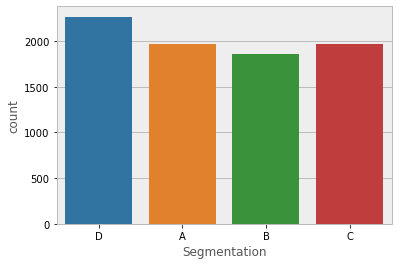

In [48]:
target = 'Segmentation'

sns.countplot(target,data=df)
# target is more or less balanced.

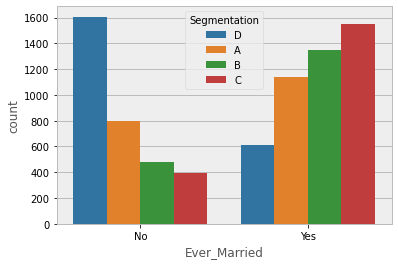

In [127]:
sns.countplot('Ever_Married', hue='Segmentation', data=df)
# marriage has opposite distribution.
# for unmarried: D>A>B>C
# for   married: D<A<B<C

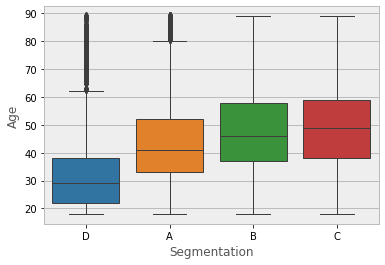

In [128]:
sns.boxplot(x='Segmentation', y='Age', data=df)
"""
younger people: group D
older people  : group B,C

""";

In [129]:
df.groupby('Segmentation')['Age'].agg(['count','min','max','mean','median','std'])

,count,min,max,mean,median,std
Segmentation,,,,,,
A,1972,18,89,44.924949,41,16.406909
B,1858,18,89,48.200215,46,14.806443
C,1970,18,89,49.144162,49,14.575090
D,2268,18,89,33.390212,29,15.680304


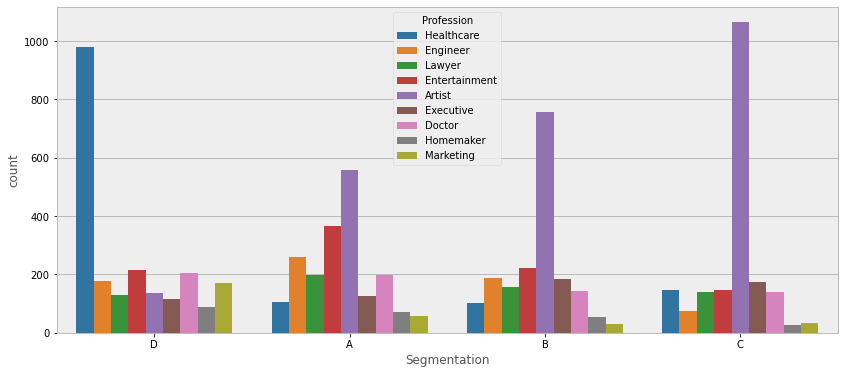

In [131]:
#Seg vs profession
plt.figure(figsize=(14,6))
sns.countplot('Segmentation',hue='Profession',data=df)

"""
Segment D: most popular profession ==> Healthcare
Other segemtns: most popular profession ==> Artist.

""";

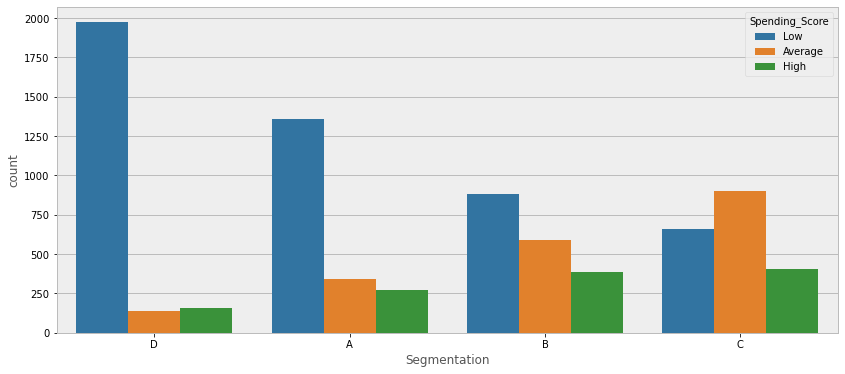

In [133]:
#Seg vs Spending Score
plt.figure(figsize=(14,6))
sns.countplot('Segmentation',hue='Spending_Score',data=df)

"""
Segment D: most customrs are low spending.
Segment C: Spending score more or less similar with Average spending highest.


""";

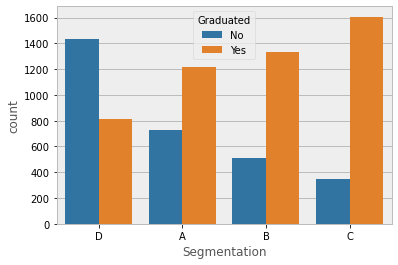

In [134]:
sns.countplot('Segmentation',hue='Graduated',data=df)

"""
Segment D: Non-graduated people are larger than graduated.
All other segemtns: Graduated people are higher.

Looks like the segment D, means low skilled people.

""";

# Univariate Analysis

## Numerical Variables

In [45]:
df.select_dtypes('number').columns

Index(['ID', 'Age', 'Work_Experience', 'Family_Size'], dtype='object')

In [42]:
def get_distplot(c,figsize=(12,6)):
    plt.figure(figsize=figsize)

    plt.subplot(121)
    sns.distplot(df[c])

    plt.subplot(122)
    sns.distplot(np.log1p(df[c]))
    plt.show()

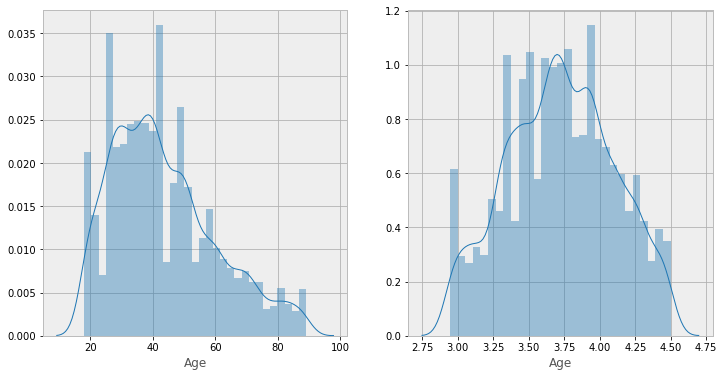

In [43]:
#Age
get_distplot('Age')

# log age is more normal

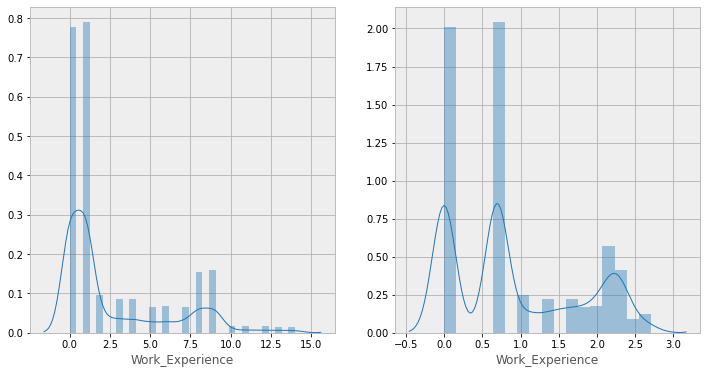

In [46]:
get_distplot('Work_Experience')
# this is more like categorical feature than numerical feature.

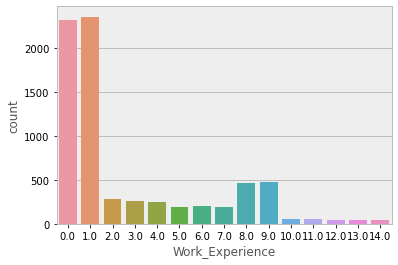

In [49]:
sns.countplot('Work_Experience',data=df)

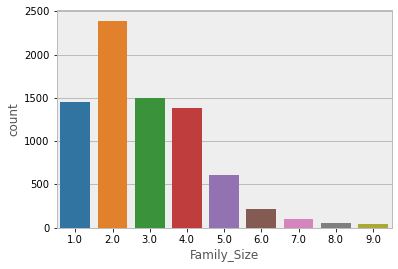

In [50]:
sns.countplot('Family_Size',data=df)

## Categorical Variables

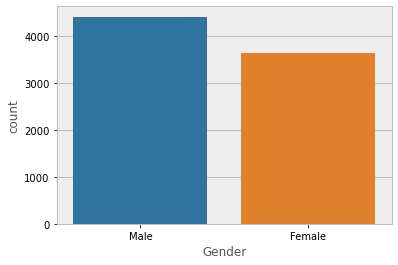

In [17]:
sns.countplot('Gender',data=df)

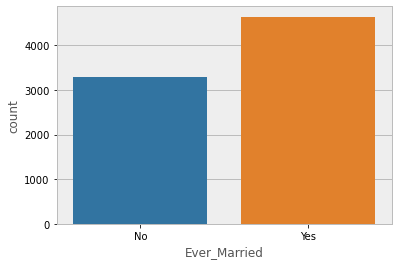

In [18]:
#Ever married:
sns.countplot('Ever_Married', data=df)

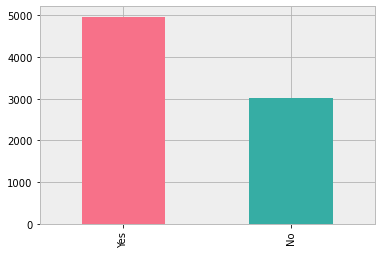

In [33]:
#Graduated: 
c = 'Graduated'
df[c].value_counts().plot.bar(color=sns.color_palette('husl',df[c].nunique()))

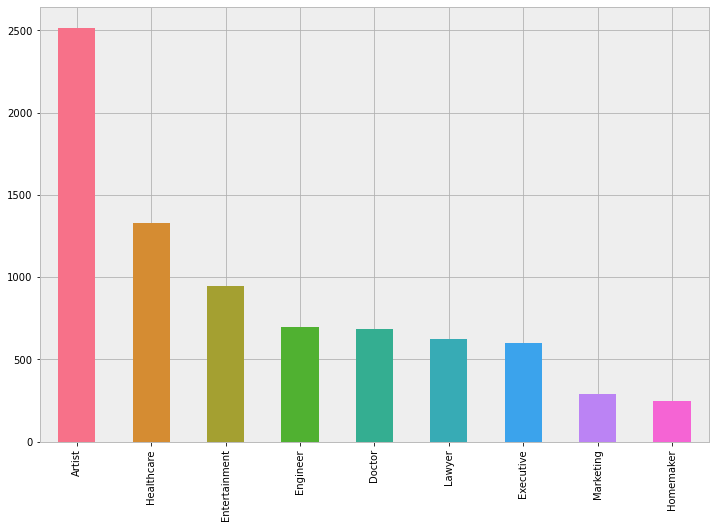

In [31]:
#Profession
c = 'Profession'
df[c].value_counts().plot.bar(color=sns.color_palette('husl',df[c].nunique()),figsize=(12,8))

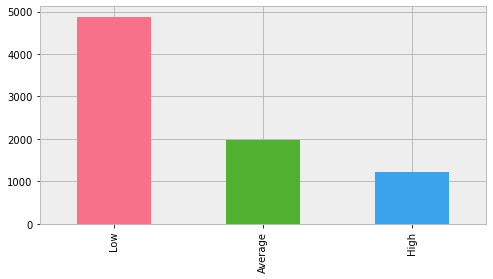

In [36]:
c = 'Spending_Score'
df[c].value_counts().plot.bar(color=sns.color_palette('husl',df[c].nunique()),figsize=(8,4))

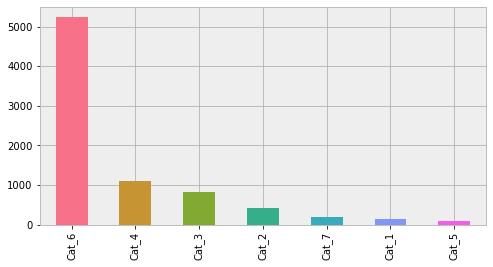

In [37]:
c = 'Var_1'
df[c].value_counts().plot.bar(color=sns.color_palette('husl',df[c].nunique()),figsize=(8,4))

# Bivariate Analysis

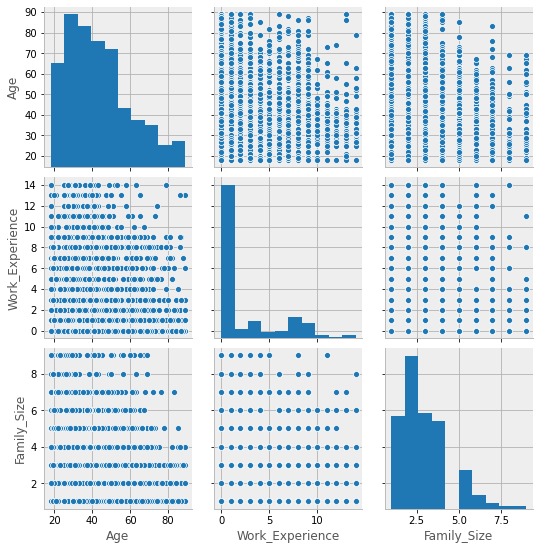

In [51]:
sns.pairplot(df.drop('ID',axis=1))

## Gender

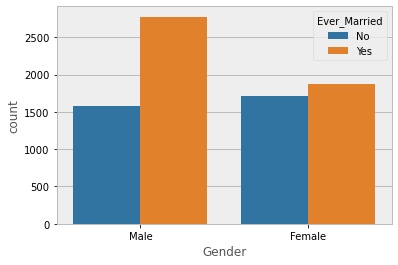

In [53]:
#Gender x Ever married
sns.countplot('Gender', hue='Ever_Married',data=df)

# females have similar number of married/unmarried number
# but, there are more married men.

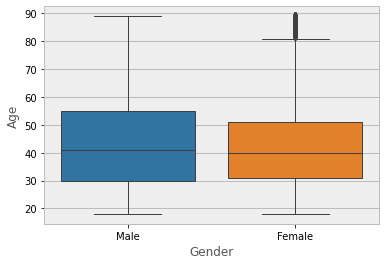

In [55]:
# Gender x Age
sns.boxplot(x='Gender',y='Age',data=df)

"""
Males distribution is more spread than female.
There are no outliers for men and  many outliers for female in higher age side.

Median age is similar.

""";

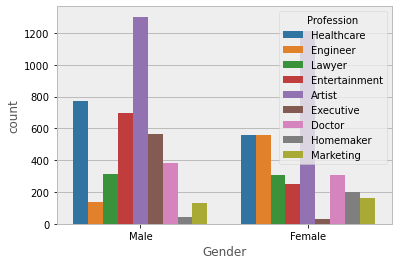

In [56]:
# Gender x Profession
sns.countplot('Gender', hue='Profession', data=df)

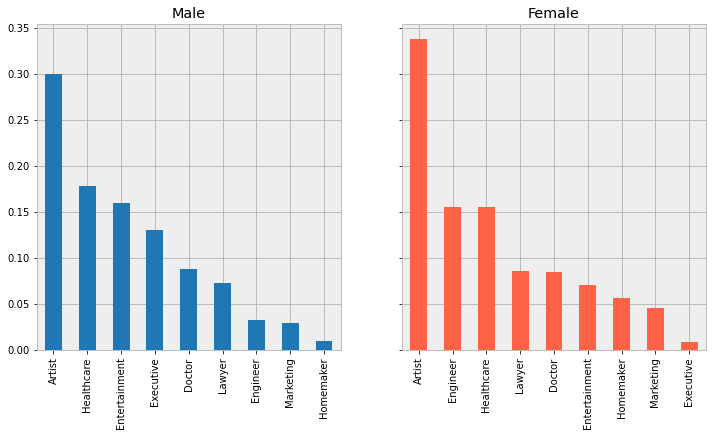

In [70]:
fig,ax = plt.subplots(1,2,sharey=True,figsize=(12,6))
df.query("Gender == 'Male'")['Profession'].value_counts(normalize=True).plot.bar(ax=ax[0],title='Male')
df.query("Gender == 'Female'")['Profession'].value_counts(normalize=True).plot.bar(ax=ax[1],color='tomato',title='Female')

"""
For both male and female: **artist** is the most frequent profession.
Among male: Helathcare is second and Executive is third.
Among female: Helathcare is third and Executive is LAST.

""";

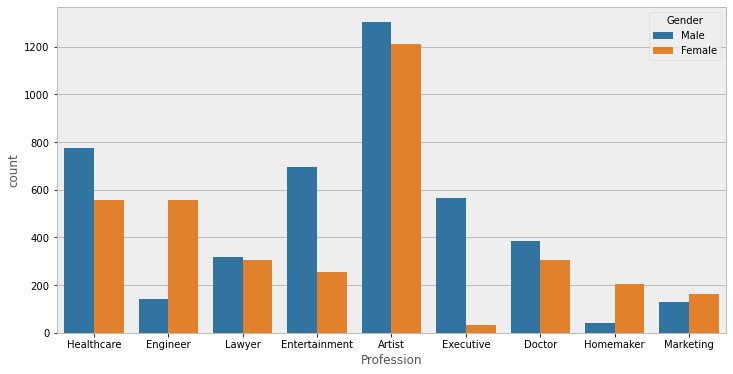

In [59]:
plt.figure(figsize=(12,6))
sns.countplot('Profession', hue='Gender', data=df)

"""
More males: healthcare, entertainment, executive, doctor
More females: engineer, homemaker, marketing
Almost similar: lawer


Extreme difference: There are so many male executives than female.
                    There are so many female engineers than males. (interesting!)

""";

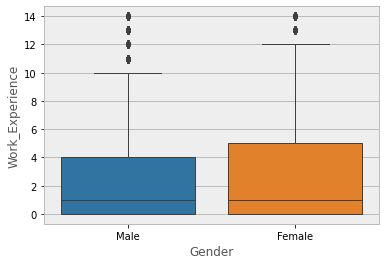

In [71]:
# Gender x Work exp
sns.boxplot(x='Gender',y='Work_Experience',data=df)

"""
Many females have more work experience than male.

""";

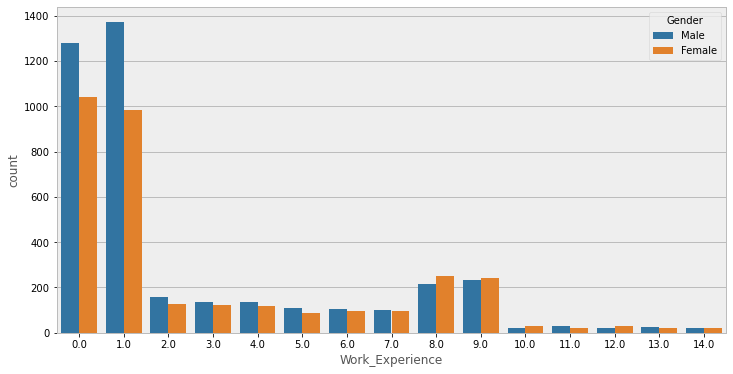

In [78]:
plt.figure(figsize=(12,6))
sns.countplot(x='Work_Experience',hue='Gender',data=df)

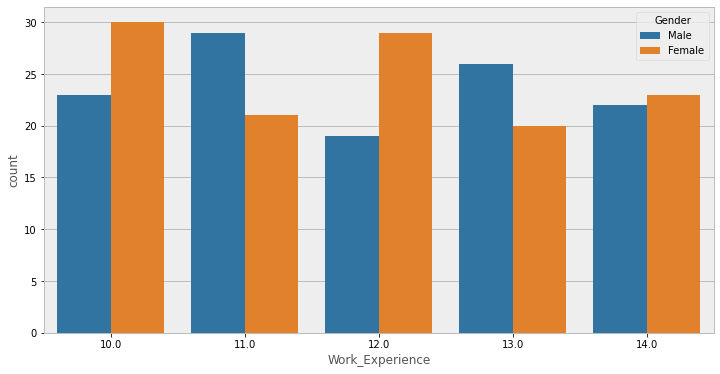

In [77]:
plt.figure(figsize=(12,6))
sns.countplot(x='Work_Experience',hue='Gender',
              data=df.query("Work_Experience > 9"))

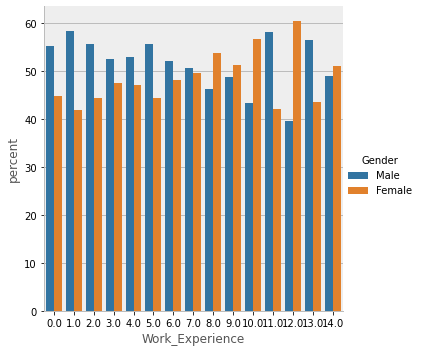

In [85]:
x,y = 'Work_Experience', 'Gender'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

"""
For lower work experience <= 7 year: in all cases there are more males.

Female high work experience: 8,9,10, 12, 14 (even though there are less total females)
Male high work experience: 11, 13


Women may tend to more stay at their profession than male.

""";

In [86]:
df['Gender'].value_counts() # not much imbalanced.

Male      4417
Female    3651
Name: Gender, dtype: int64

## Married

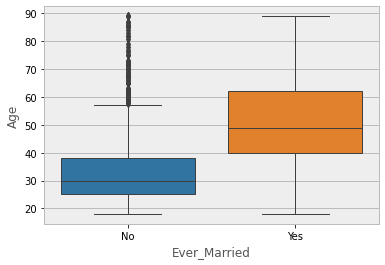

In [87]:
#Ever married x age
sns.boxplot(x='Ever_Married',y='Age', data=df)

"""
As expected, median age of married is larger than unmarried.
Also, unmarried people have a lot outliers.

""";

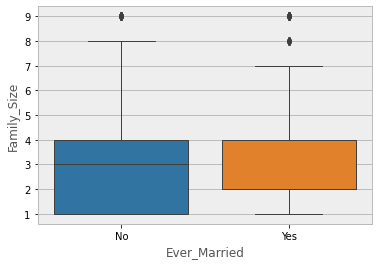

In [88]:
#Ever Married x Family Size
sns.boxplot(x='Ever_Married',y='Family_Size',data=df)

"""
Family size for married is less spread, almost between 2 to 4.
But, unmarried people familiy size is well spread.

""";

In [90]:
df.groupby('Ever_Married')['Family_Size'].describe()
"""
median family size for unmarried is 3 but married is 2.
This makes sense, if you are married couple equals 2,
but if you are unmarried you and your parents count to 3.

""";

## Spending Score

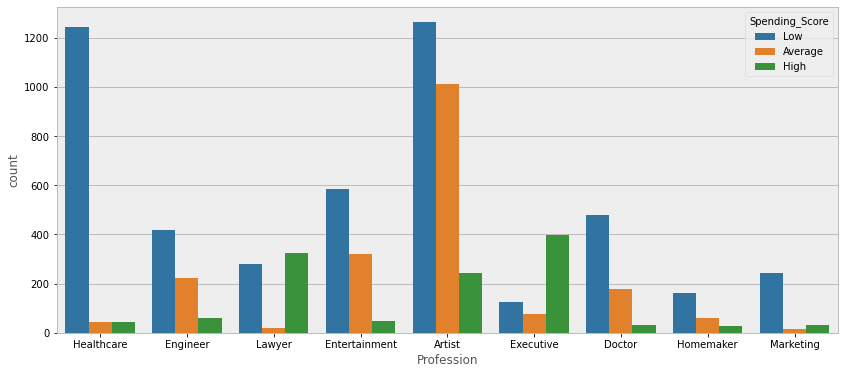

In [91]:
#Profession x spending score
plt.figure(figsize=(14,6))
sns.countplot('Profession', hue='Spending_Score', data=df)

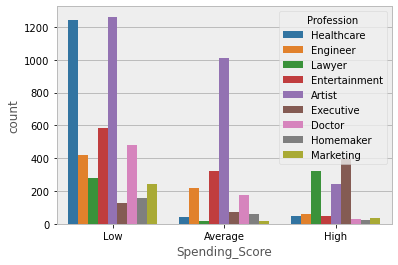

In [93]:
sns.countplot('Spending_Score', hue='Profession', data=df)

,Spending_Score,Profession,count
0,Average,Artist,1011
1,Average,Entertainment,319


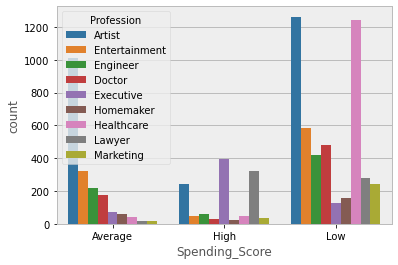

In [104]:
dfx = df.groupby('Spending_Score')['Profession'].value_counts().rename('count').reset_index()

display(dfx.head(2))
sns.barplot(x='Spending_Score',y='count',hue='Profession',data=dfx)

In [105]:
pd.crosstab(df['Spending_Score'],df['Profession'])

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
Spending_Score,,,,,,,,,
Average,1011,177,221,319,75,42,60,18,17
High,242,31,60,46,398,45,26,324,33
Low,1263,480,418,584,126,1245,160,281,242


In [106]:
pd.crosstab(df['Spending_Score'],df['Profession'],normalize='columns')

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
Spending_Score,,,,,,,,,
Average,0.401828,0.257267,0.316166,0.336143,0.125209,0.031532,0.243902,0.028892,0.058219
High,0.096184,0.045058,0.085837,0.048472,0.664441,0.033784,0.105691,0.520064,0.113014
Low,0.501987,0.697674,0.597997,0.615385,0.210351,0.934685,0.650407,0.451043,0.828767


In [107]:
pd.crosstab(df['Spending_Score'],df['Profession'],normalize='index')

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
Spending_Score,,,,,,,,,
Average,0.521134,0.091237,0.113918,0.164433,0.038660,0.021649,0.030928,0.009278,0.008763
High,0.200830,0.025726,0.049793,0.038174,0.330290,0.037344,0.021577,0.268880,0.027386
Low,0.263180,0.100021,0.087101,0.121692,0.026255,0.259429,0.033340,0.058554,0.050427


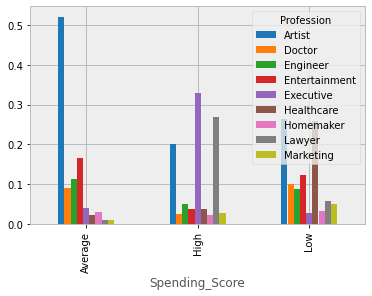

In [108]:
pd.crosstab(df['Spending_Score'],df['Profession'],normalize='index').plot.bar()

"""
For spending group average: most purchases are from artists
For spending group high   : most purchases are from artist, executives, lawyer
For spending group low    : most purchases are from artist, healthcare.


Artist     will purchase, regardless of their spending score.
Healthcare will purchase, even if they have low spending score.
""";

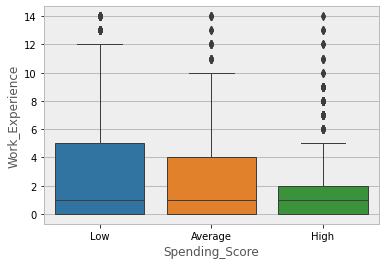

In [109]:
# Work exp x spending score
sns.boxplot(x='Spending_Score', y='Work_Experience', data=df)

"""
If you have low spending score,  work experience is more spread and have less outliers.
If you have high spending score, work experience is less spread and have more outliers.

""";

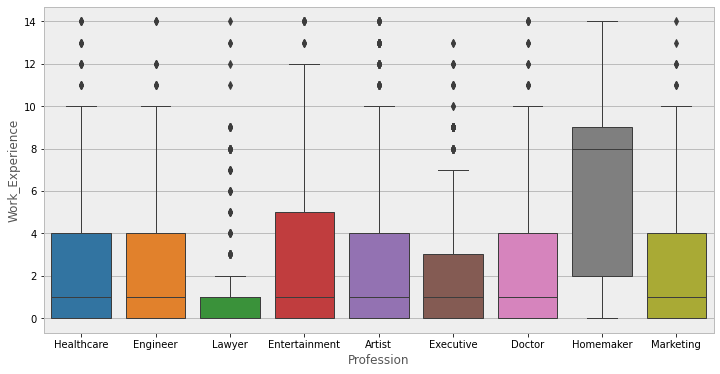

In [111]:
# Profession x work rxp
plt.figure(figsize=(12,6))
sns.boxplot(x='Profession', y='Work_Experience', data=df)

"""
Lawyers seem to have a low median work exp (and also a low spread),

and homemakers have a very high median work exp

""";

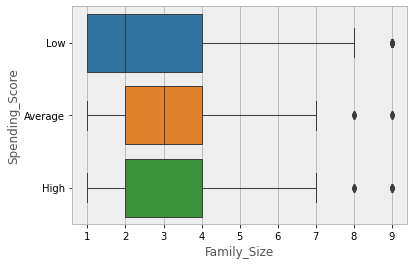

In [115]:
#Spending score x Family size 
sns.boxplot(x='Family_Size',y='Spending_Score',data=df)

"""
If family size is 2,3,4 then, spending is avg or high.

If family size is 1, then usually spending is low.

""";

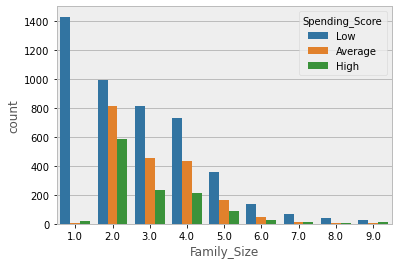

In [117]:
sns.countplot('Family_Size', hue='Spending_Score',data=df)

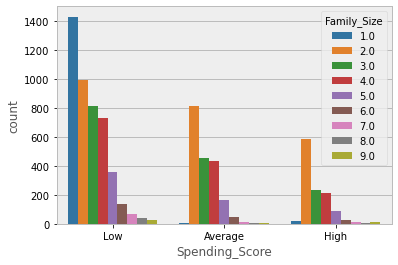

In [118]:
sns.countplot('Spending_Score', hue='Family_Size',data=df)

In [119]:
df.groupby('Spending_Score')['Family_Size'].describe()

"""
Both low and high spending score have median family size: 2

""";

,count,mean,std,min,25%,50%,75%,max
Spending_Score,,,,,,,,
Average,1943.0,3.104992,1.234290,1.0,2.0,3.0,4.0,9.0
High,1187.0,2.990733,1.356049,1.0,2.0,2.0,4.0,9.0
Low,4603.0,2.706279,1.664420,1.0,1.0,2.0,4.0,9.0


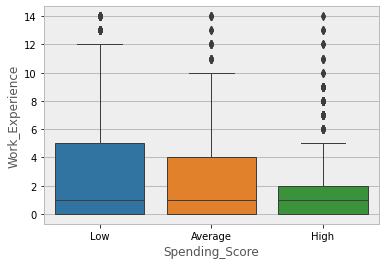

In [120]:
#Spending score x Work exp 
sns.boxplot(x='Spending_Score', y='Work_Experience', data=df)

"""
If you have spending score **high** then, work experience is <=2 years.
Maybe they leave the job too early.

""";

In [122]:
df.groupby('Spending_Score')['Work_Experience'].describe()
"""
Surprisingly, all spending score have same median work experience: 1 years.

""";

,count,mean,std,min,25%,50%,75%,max
Spending_Score,,,,,,,,
Average,1765.0,2.518414,3.237627,0.0,0.0,1.0,4.0,14.0
High,1069.0,2.103835,2.999606,0.0,0.0,1.0,2.0,14.0
Low,4405.0,2.821566,3.547580,0.0,0.0,1.0,5.0,14.0


## Graduated

In [124]:
df['Graduated'].value_counts()

Yes    4968
No     3022
Name: Graduated, dtype: int64

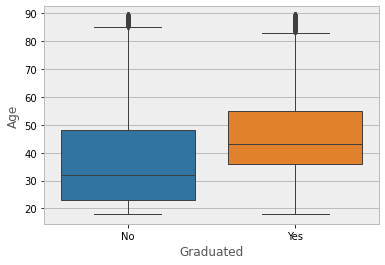

In [125]:
# Graduated x age
sns.boxplot(x='Graduated', y='Age', data=df)

In [126]:
df.groupby('Graduated')['Age'].agg(['count','min','max','mean','median','std'])

,count,min,max,mean,median,std
Graduated,,,,,,
No,3022,18,89,38.376241,32,18.379691
Yes,4968,18,89,46.542271,43,14.739692


## Profession

In [145]:
df.head(2)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A


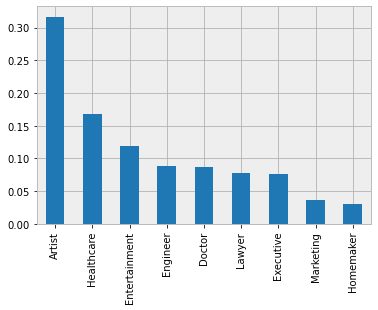

In [147]:
df['Profession'].value_counts(normalize=True).plot.bar()

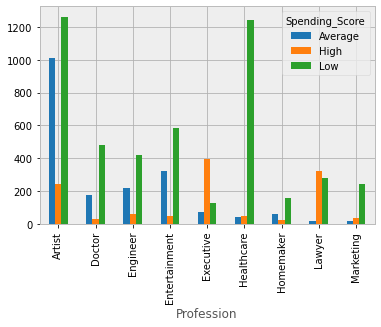

In [149]:
pd.crosstab(df['Profession'],df['Spending_Score']).plot.bar()

# Correlation

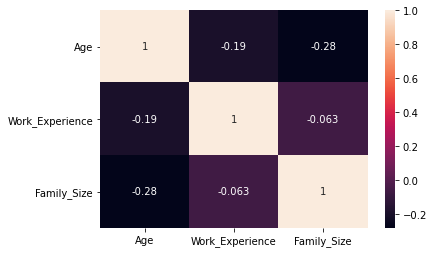

In [136]:
sns.heatmap(df.drop('ID',1).corr(),annot=True)

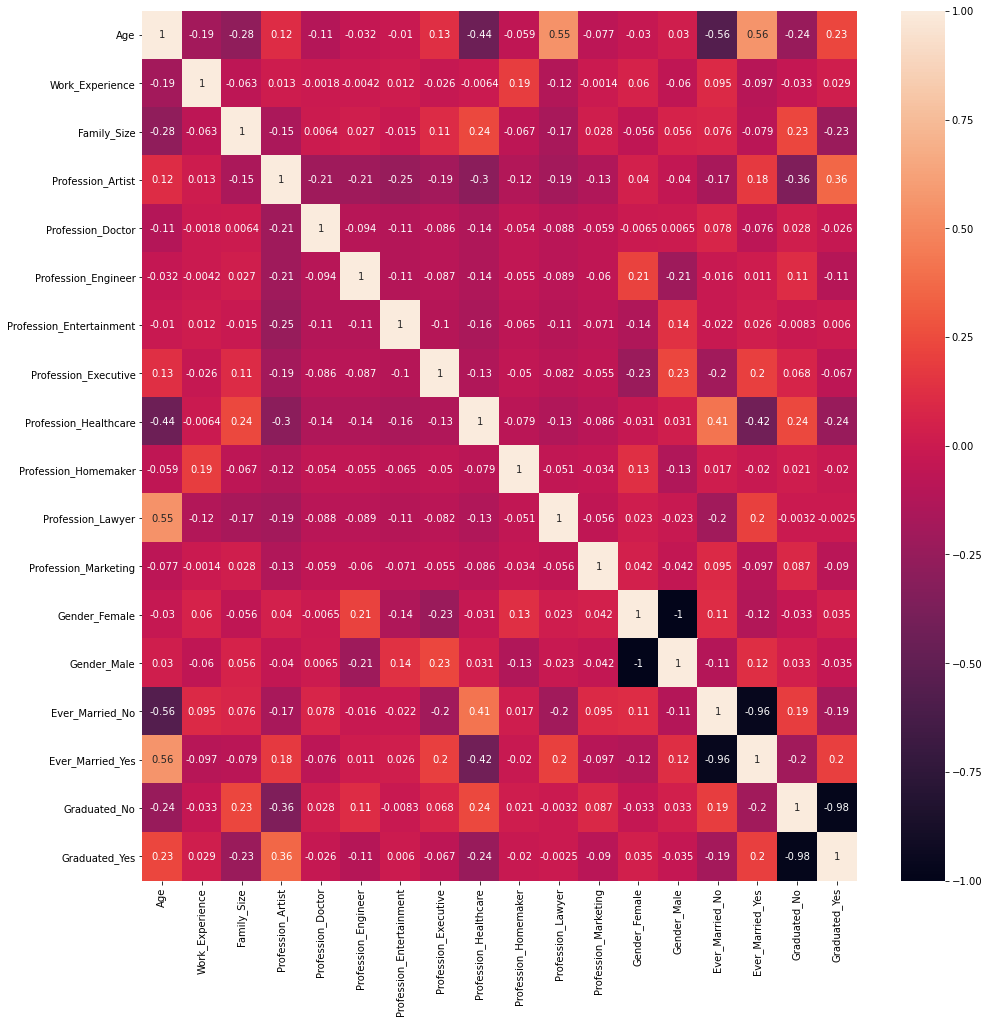

In [138]:
df2 = pd.get_dummies(data=df, columns={'Gender', 'Ever_Married', 'Graduated', 'Profession'})

plt.figure(figsize=(16,16))
sns.heatmap(df2.drop('ID',1).corr(),annot=True)